In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [2]:
data = pd.read_csv("nigeria_houses_data.csv")


In [3]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [5]:
data['title'].unique()


array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [6]:
data['state'].unique()


array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

<AxesSubplot:xlabel='state'>

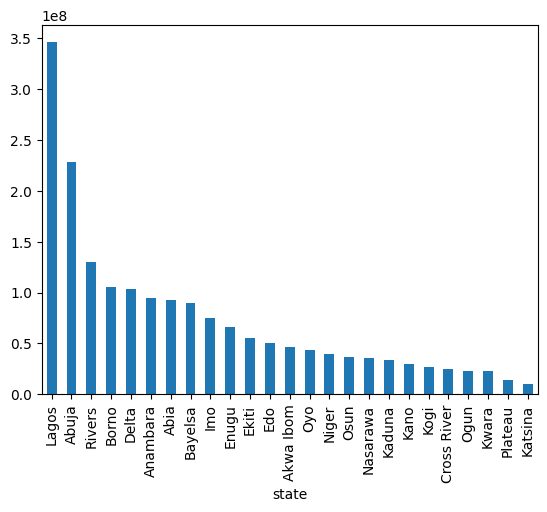

In [7]:
data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='town'>

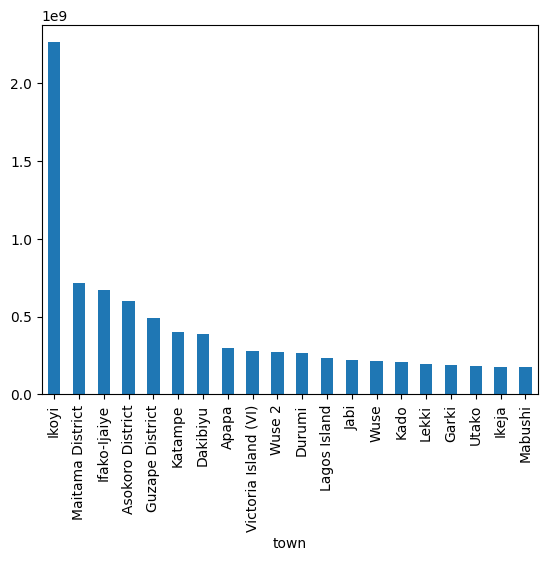

In [8]:
data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')


In [9]:
print(data[data["town"]=="Ikoyi"].max())
print(data[data["town"]=="Ifako-Ijaiye"].max())
print(data[data["town"]=="Ikeja"].max())

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object
bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
price                 1440000000.0
dtype: object


In [10]:
trimmed_data = q1, q9 = data["price"].quantile([0.15,0.85])
mask_data = data["price"].between(q1,q9)
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [11]:
trimmed_data['town'].unique()


array(['Lekki', 'Ajah', 'Oredo', 'Lokogoma District',
       'Victoria Island (VI)', 'Katampe', 'Magodo', 'Kaura', 'Galadimawa',
       'Gwarinpa', 'Yaba', 'Agege', 'Jahi', 'Orozo', 'Owerri North',
       'Ikeja', 'Idu Industrial', 'Owerri Municipal', 'Isheri North',
       'Utako', 'Guzape District', 'Port Harcourt', 'Isheri', 'Ibadan',
       'Ikoyi', 'Life Camp', 'Dape', 'Ejigbo', 'Isolo', 'Gaduwa', 'Dakwo',
       'Asokoro District', 'Chikun', 'Ojodu', 'Lugbe District', 'Wuye',
       'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Sango Ota',
       'Surulere', 'Obio-Akpor', 'Enugu', 'Apo', 'Ibeju Lekki', 'Wuse 2',
       'Mowe Town', 'Durumi', 'Simawa', 'Arepo', 'Mabushi', 'Alimosho',
       'Maryland', 'Karsana', 'Wuse', 'Karmo', 'Ifo', 'Gbagada', 'Idimu',
       'Maitama District', 'Gudu', 'Ikotun', 'Kukwaba', 'Mbora (Nbora)',
       'Jabi', 'Ikorodu', 'Kaduna South', 'Asaba', 'Uyo', 'Kosofe',
       'Ibafo', 'Ilupeju', 'Afijio', 'Ifako-Ijaiye', 'Ado-Ekiti', 'Ipaja',
       'Oluyo

In [12]:
records = trimmed_data['state'].value_counts()
records

state
Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: count, dtype: int64

In [13]:
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records < 100].index)]

In [14]:
trimmed_data['state'].value_counts()


state
Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: count, dtype: int64

<AxesSubplot:title={'center':'Most Expensive towns in nigeria'}, xlabel='town'>

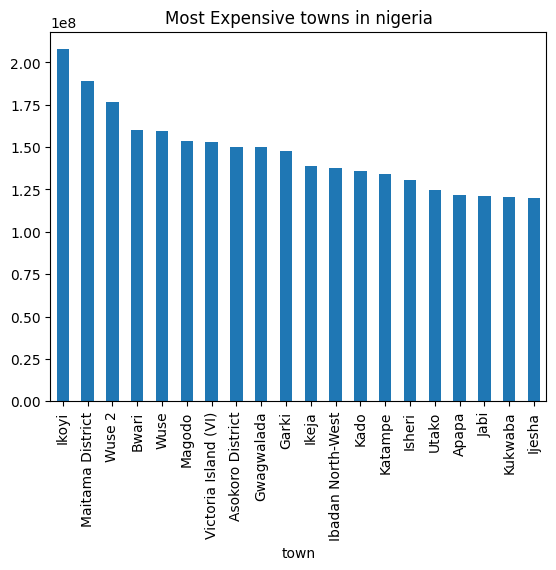

In [15]:
trimmed_data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in nigeria")

In [16]:
trimmed_data


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [17]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']

C:\Users\vicma\AppData\Local\Temp\ipykernel_22852\1034165030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']


In [18]:
trimmed_data


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


In [19]:
corr = trimmed_data.corr()
sns.heatmap(corr, annot=True)


ValueError: could not convert string to float: 'Detached Duplex'

In [ ]:
trimmed_data.drop(columns=['parking_space', 'title', 'town', 'state'], inplace = True)


In [ ]:
trim = q1, q9 = trimmed_data["price"].quantile([0.1, 0.9])
mask = trimmed_data["price"].between(q1,q9)
trimmed_data = trimmed_data[mask]

In [ ]:
trimmed_data

In [ ]:
trimmed_data.info()


In [ ]:
X = trimmed_data.drop('price', axis = 1)
y = trimmed_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regression': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")

In [ ]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print("Baseline MSE:", mean_squared_error(y_train, y_pred_baseline))

In [ ]:
gbr = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [150, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameter: ", best_params)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

In [ ]:
y_pred = best_grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
    # Add other hyperparameters to explore
}

random_search = RandomizedSearchCV(gbr, param_distributions, n_iter=100, cv = 5, n_jobs = -1)

random_search.fit(X_train, y_train)

In [ ]:
best_params_randCV = random_search.best_params_
print("Best Hyperparameters:", best_params_randCV)

In [ ]:
best_grid_randCV = random_search.best_estimator_
best_grid_randCV

In [ ]:
y_pred = best_grid_randCV.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

In [ ]:
def make_prediction(bedrooms, bathrooms, toilets, total_rooms):

    data = {"bedrooms":bedrooms,
            "bathrooms":bathrooms,
            "toilets":toilets,
            "total_rooms":total_rooms
    }
    
    df = pd.DataFrame(data, index=[0])
    prediction = best_grid_randCV.predict(df)
    return f"Predicted apartment price: ₦{prediction}"

In [ ]:
make_prediction(bedrooms = 3, bathrooms = 4,toilets = 6, total_rooms = 16)

In [ ]:
custom_font_style = {
    'font-family': 'Arial',   
    'font-size': '20px'      
}

interact(
    make_prediction,    
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
        style=custom_font_style
    ),
    bathrooms=IntSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        step=1,
        value=X_train["bathrooms"].mean(),
        style=custom_font_style
    ),
    toilets=IntSlider(
        min=X_train["toilets"].min(),
        max=X_train["toilets"].max(),
        step=1,
        value=X_train["toilets"].mean(),
        style=custom_font_style
    ),
    total_rooms=IntSlider(
        min=X_train["total_rooms"].min(),
        max=X_train["total_rooms"].max(),
        step=1,
        value=X_train["total_rooms"].mean(),
        style=custom_font_style
    )
    
);